## Entrega Final: Data Science <br> **Andrés Burbano**
####  ***Caso: Campaña de Marketing de un banco de Portugal*** 
##### Fuente dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing


## **Introducción:**

El dataset "Bank Marketing Data" contiene información recopilada durante una campaña de marketing realizada por un banco portugués. El objetivo de la campaña era promocionar depósitos a plazo fijo entre los clientes del banco. El dataset incluye información sobre características demográficas y financieras de los clientes, así como detalles sobre la campaña de marketing y **si los clientes contrataron o no un depósito a plazo fijo**. Con más de 15 atributos y más de 10,000 registros, este dataset proporciona una gran cantidad de datos para analizar y extraer información valiosa.

### **Contexto empresarial**
La empresa bancaria está interesada en mejorar sus prácticas de marketing y aumentar la eficacia de sus campañas de promoción de depósitos a plazo fijo. En los últimos años, se ha observado una tasa de conversión relativamente baja en las campañas, lo que sugiere que no se está llegando eficazmente al público objetivo. La gerencia sospecha que una de las razones detrás de esta baja tasa de conversión podría ser una posible discriminación en la distribución de las ofertas de depósitos a plazo fijo entre diferentes segmentos de clientes.

#### ***Hipótesis:***
*Existe una disparidad en la distribución de ofertas de depósitos a plazo fijo entre diferentes grupos demográficos de clientes. Específicamente, se sospecha que hay diferencias significativas en la tasa de conversión de clientes basadas en características como edad, estado civil, educación, etc.*. Por otra parte, la forma en como se realizó la campaña puede influir: Pej. duración de la llamada.

En el presente Notebook trabajaremos sobre estas hipótesis:

> **1**. El grupo de  **edad adulta (18-35 años)** es determinante puesto que en este rango de edad se adquiere una conciencia económica para hacer la inversión de un depósito a plazo fijo.

> **2**. La **las llamadas que duran menos tiempo** son las que muestran que el cliente no está interesado en la oferta

### **Problema empresarial**
Como parte de los esfuerzos para mejorar la efectividad de las campañas de marketing, el banco desea investigar si existe alguna disparidad en la distribución de ofertas de depósitos a plazo fijo entre diferentes grupos demográficos de clientes. Específicamente, se preguntan: "¿Hay diferencias significativas en la tasa de conversión de clientes basadas en características demográficas como edad, estado civil, educación, etc.?"

### **Contexto analítico**

Para abordar este problema, utilizaremos el dataset que contiene información detallada sobre los clientes del banco, así como detalles sobre la campaña de marketing y si los clientes contrataron o no un depósito a plazo fijo. El enfoque analítico implicará un análisis exploratorio de datos para comprender la distribución de las ofertas de depósitos a plazo fijo entre diferentes segmentos de clientes. Luego, se aplicarán técnicas estadísticas y de modelado para identificar cualquier disparidad en la tasa de conversión de clientes y determinar los factores que podrían estar contribuyendo a esta disparidad. Esto permitirá mejorar estrategias de marketing y aumentar la eficacia de campañas de promoción de depósitos a plazo fijo.

### **Variables del dataset:**

1. **age**: edad (numérico)
2. **job**: trabajo: tipo de trabajo (categórico: "admin.", "desconocido", "desempleado", "gerencia", "ama de casa", "emprendedor", "estudiante", "trabajador", "autónomo", "jubilado", "técnico", "servicios")
3. **marital**: marital status - estado civil: estado civil (categórico: "casado", "divorciado", "soltero"; nota: "divorciado" significa divorciado o viudo)
4. **education**: educación (categórico: "desconocido", "secundaria", "primaria", "terciaria")
5. **default**: incumplimiento: ¿tiene crédito en incumplimiento? (binario: "sí", "no")
6. **balance**: saldo: saldo promedio anual, en euros (numérico)
7. **housing**: vivienda: ¿tiene préstamo hipotecario? (binario: "sí", "no")
8. **loan**: préstamo: ¿tiene préstamo personal? (binario: "sí", "no")

#### Relacionado con el último contacto de la campaña actual:
9. **contact**: contacto: tipo de comunicación de contacto (categórico: "desconocido", "teléfono", "celular")
10. **day**: día: último día de contacto del mes (numérico)
11. **month**: mes: último mes de contacto del año (categórico: "ene", "feb", "mar", ..., "nov", "dic")
12. **duration**: duración: duración del último contacto, en segundos (numérico)

#### Otros atributos
13. **campaign**: campaña: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
14. **pdays**: dias-pasados: número de días que han pasado desde el último contacto del cliente en una campaña anterior (numérico, -1 significa que el cliente no fue contactado anteriormente)
15. **previous**: anterior: número de contactos realizados antes de esta campaña y para este cliente (numérico)
16. **poutcome**: res-anterior: resultado de la campaña de marketing anterior (categórico: "desconocido", "otro", "fracaso", "éxito")

#### Variable de Salida (objetivo deseado target):
17. **y**: deposito: ¿ha suscrito el cliente un depósito a plazo? (binario: "sí", "no")

### **Definición del tipo de problema**
De acuerdo con el contexto expresado anteriormente y dado que el conjunto de datos posee una variable *target* **deposito** (de tipo binaria), el problema que se abordará es de **clasificación supervisada**.

## **1. EDA (Análisis exploratorio de datos)**

In [1]:
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np


import matplotlib.pyplot       as plt
import seaborn                 as sns
import matplotlib              as mpl

#%matplotlib inline

In [2]:
# Configurando matplotlib
mpl.rcParams['axes.titleweight'] = 'bold'
#mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.titlecolor'] = 'blue'#'firebrick'
mpl.rcParams['axes.labelcolor'] = 'blue'
mpl.rcParams['axes.labelsize'] = '10'
mpl.rcParams['axes.labelweight'] = 'light'
mpl.rcParams['axes.linewidth'] = '1'
mpl.rcParams['grid.color'] = 'black'
mpl.rcParams['grid.linestyle'] = '-.'
mpl.rcParams['grid.linewidth'] = '2'

In [3]:
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fast')

In [4]:
# Configurando seaborn
sns.set_style(style="white")
sns.set_style(rc={"grid.linestyle": ":"})
sns.set_style(rc={"axes.titleweight": "normal"})
sns.set_style(rc={"axes.titlecolor": "blue"})
sns.set_style(rc={"axes.labelcolor": "blue"})
sns.set_style(rc={"axes.labelsize": "12"})
sns.set_style(rc={"axes.labelweight": "normal"})
sns.set_style(rc={"axes.linewidth": "0.5"})
sns.set_style(rc={"grid.color": "purple"})
sns.set_style(rc={"grid.linestyle": "--"})
sns.set_style(rc={"grid.linewidth": "0.5"})
sns.set_style(rc={"font.fantasy": "Comic Sans MS"})
sns.set_style(rc={"font.serif": "Utopia"})

In [135]:
# (Opción 1) Importar Dataset desde GitHub

url = 'https://raw.githubusercontent.com/andres-coder-dev/entrega-ds-f/main/Dataset/bank%2Bmarketing/bank-full.csv'
Data = pd.read_csv(url, delimiter=';')

In [7]:
# (Opción 2) Importarlo desde Local
# path = './Dataset/bank+marketing/'
# Data = pd.read_csv(path+'bank-full.csv', delimiter=';')

In [122]:
# Visualización del DataFrame
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### **¿Es necesario implementar PCA en este análisis?**
En este análisis, estamos abordando un problema de clasificación supervisada con el objetivo de predecir si un cliente suscribirá un depósito a plazo. Si bien PCA (Análisis de Componentes Principales) es una técnica poderosa para la reducción de dimensionalidad y la extracción de características **no es necesario implementarla** en este contexto por las siguientes razones:

1. **Número de Características Relativamente Bajo:**<br>
Nuestro conjunto de datos no contiene una cantidad excesiva de características. La mayoría de los modelos de clasificación pueden manejar eficientemente el número actual de características sin que se produzcan problemas de sobreajuste o complejidad computacional excesiva.

2. **Interpretabilidad de las Características:** <br>
Las características actuales en nuestro conjunto de datos (como edad, trabajo, estado civil, educación, etc.) son intuitivamente comprensibles y directamente interpretables. Aplicar PCA transformaría estas características en combinaciones lineales abstractas que serían más difíciles de interpretar en términos del problema de negocio.

3. **Preservación de Información Supervisada:**<br>
PCA es una técnica no supervisada, lo que significa que no toma en cuenta la variable objetivo (en este caso, "deposito") al reducir la dimensionalidad. Al no considerar la variable objetivo, PCA podría eliminar componentes que son importantes para la clasificación. En lugar de ello, podríamos emplear técnicas supervisadas como la selección de características que consideren la relevancia de las características con respecto a la variable objetivo.

4. **Eficiencia Computacional y Complejidad:**<br>
La implementación de PCA introduce una capa adicional de complejidad y procesamiento computacional. Dado que nuestros datos no sufren de alta dimensionalidad, podemos mantener el análisis más simple y eficiente sin PCA.

5. **Modelos de Clasificación Robustos:**<br>
Muchos algoritmos de clasificación modernos (como Random Forests, Gradient Boosting, etc.) son robustos frente a la alta dimensionalidad y pueden manejar características correlacionadas de manera efectiva. Estos algoritmos también incluyen mecanismos integrados de selección de características y regularización.

### **Pre-procesamiento de los datos**

Al estar en el idioma Inglés, se convertirá a Español todo el data set usando funciones de Python

In [136]:
Data = Data.rename(columns={
    "age": "edad",
    "job": "trabajo",
    "marital": "estado_civil",
    "education": "educacion",
    "default": "incumplimiento",
    "balance": "saldo",
    "housing": "vivienda",
    "loan": "prestamo",
    "contact": "contacto",
    "day": "dia",
    "month": "mes",
    "duration": "duracion",
    "campaign": "campana",
    "pdays": "dias-pasados",
    "previous": "anterior",
    "poutcome": "res-anterior",
    "y": "deposito"
})

# Mapeo de valores categóricos
Data['trabajo'] = Data['trabajo'].replace({
    "admin.": "administrativo",
    "unknown": "desconocido",
    "unemployed": "desempleado",
    "management": "gerencia",
    "housemaid": "ama de casa",
    "entrepreneur": "emprendedor",
    "student": "estudiante",
    "blue-collar": "trabajador",
    "self-employed": "autonomo",
    "retired": "jubilado",
    "technician": "tecnico",
    "services": "servicios"
})

Data['estado_civil'] = Data['estado_civil'].replace({
    "married": "casado",
    "divorced": "divorciado",
    "single": "soltero"
})

Data['educacion'] = Data['educacion'].replace({
    "unknown": "desconocido",
    "secondary": "secundaria",
    "primary": "primaria",
    "tertiary": "terciaria"
})

Data['incumplimiento'] = Data['incumplimiento'].replace({
    "yes": "si",
    "no": "no"
})

Data['vivienda'] = Data['vivienda'].replace({
    "yes": "si",
    "no": "no"
})

Data['prestamo'] = Data['prestamo'].replace({
    "yes": "si",
    "no": "no"
})

Data['contacto'] = Data['contacto'].replace({
    "unknown": "desconocido",
    "telephone": "telefono",
    "cellular": "celular"
})

Data['mes'] = Data['mes'].replace({
    "jan": "ene",
    "feb": "feb",
    "mar": "mar",
    "apr": "abr",
    "may": "may",
    "jun": "jun",
    "jul": "jul",
    "aug": "ago",
    "sep": "sep",
    "oct": "oct",
    "nov": "nov",
    "dec": "dic"
})

Data['res-anterior'] = Data['res-anterior'].replace({
    "unknown": "desconocido",
    "other": "otro",
    "failure": "fracaso",
    "success": "exito"
})

Data['deposito'] = Data['deposito'].replace({
    "yes": "si",
    "no": "no"
})

In [124]:
# Mostrar las primeras filas del DataFrame para verificar los cambios
Data.head()

,edad,trabajo,estado_civil,educacion,incumplimiento,saldo,vivienda,prestamo,contacto,dia,mes,duracion,campana,dias-pasados,anterior,res-anterior,deposito
0,58,gerencia,casado,terciaria,no,2143,si,no,desconocido,5,may,261,1,-1,0,desconocido,no
1,44,tecnico,soltero,secundaria,no,29,si,no,desconocido,5,may,151,1,-1,0,desconocido,no
2,33,emprendedor,casado,secundaria,no,2,si,si,desconocido,5,may,76,1,-1,0,desconocido,no
3,47,trabajador,casado,desconocido,no,1506,si,no,desconocido,5,may,92,1,-1,0,desconocido,no
4,33,desconocido,soltero,desconocido,no,1,no,no,desconocido,5,may,198,1,-1,0,desconocido,no


In [125]:
# Determinar la forma del dataset: Features (Características/Columnas/Variables) e Instances (Instancias/Filas) 
Data.shape

(45211, 17)

In [126]:
# Características del dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   edad            45211 non-null  int64 
 1   trabajo         45211 non-null  object
 2   estado_civil    45211 non-null  object
 3   educacion       45211 non-null  object
 4   incumplimiento  45211 non-null  object
 5   saldo           45211 non-null  int64 
 6   vivienda        45211 non-null  object
 7   prestamo        45211 non-null  object
 8   contacto        45211 non-null  object
 9   dia             45211 non-null  int64 
 10  mes             45211 non-null  object
 11  duracion        45211 non-null  int64 
 12  campana         45211 non-null  int64 
 13  dias-pasados    45211 non-null  int64 
 14  anterior        45211 non-null  int64 
 15  res-anterior    45211 non-null  object
 16  deposito        45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Este resultado muestra que el dataset tiene 17 columnas y 45211 filas. Estas representan 17 variables (características) y 45211 registros, con ningún dato faltante (non-null), también muestra que hay 7 variables numéricas (int64) y 10 categóricas (object)

### **Manejo de datos nulos**

In [116]:
# Procedemos a describir el dataset: (incluyendo todas las columnas)
Data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
edad,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
trabajo,45211,12,trabajador,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estado_civil,45211,3,casado,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educacion,45211,4,secundaria,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incumplimiento,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saldo,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
vivienda,45211,2,si,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prestamo,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contacto,45211,3,celular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dia,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [117]:
# ¿Hay nulos?
Data.isnull().mean()

edad              0.0
trabajo           0.0
estado_civil      0.0
educacion         0.0
incumplimiento    0.0
saldo             0.0
vivienda          0.0
prestamo          0.0
contacto          0.0
dia               0.0
mes               0.0
duracion          0.0
campana           0.0
dias-pasados      0.0
anterior          0.0
res-anterior      0.0
deposito          0.0
dtype: float64

### **Conclusión sobre datos nulos:**
### *No se observan valores nulos, tampoco ausencia de valores*

### **Exploración Inicial**

#### **1.** Análisis de la variable objetivo (si un cliente contrató o no un depósito a plazo fijo), variable 'y'

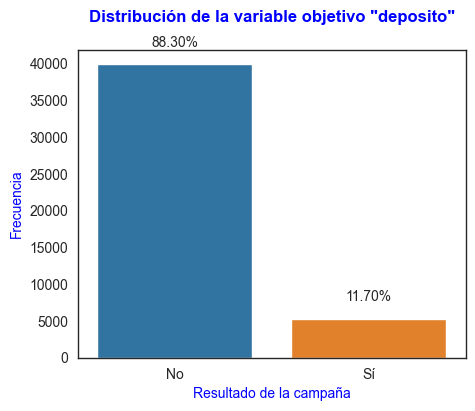

In [118]:
counts = Data['deposito'].value_counts()
percentages = counts / counts.sum() * 100

df_counts = pd.DataFrame({'count': counts, 'percentage': percentages})
df_counts['Resultado'] = df_counts.index

# Definir una paleta de colores personalizada
palette = {'no': '#1f77b4', 'si': '#ff7f0e'}

plt.figure(figsize=(5, 4))
sns.barplot(x='Resultado', y='count', data=df_counts, hue='Resultado', dodge=False, legend=False, palette=palette)

for i, (count, percentage) in enumerate(zip(df_counts['count'], df_counts['percentage'])):
    plt.text(i, count + 0.05 * max(counts), f'{percentage:.2f}%', ha='center', va='bottom')

plt.title('Distribución de la variable objetivo "deposito"', pad=20)
plt.xlabel('Resultado de la campaña')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

# Mostramos la gráfica
plt.show()

#### **Interpretación de la gráfica:**
Siendo la variable objetivo 'y' indica si un cliente contrató o no un depósito a plazo fijo. <br>
Entonces **la mayoría** de los clientes no contrataron un depósito a plazo fijo.

Al observar los porcentajes anotados en la gráfica:

* Aproximadamente 88.30% de los clientes no contrataron un depósito a plazo fijo.
* Aproximadamente 11.70% de los clientes sí contrataron un depósito a plazo fijo.

Este desequilibrio en la distribución sugiere que la mayoría de los clientes no están interesados o no fueron convencidos de contratar este tipo de producto financiero

## **2. Exploración de variables:**

##### **2.1** ***Variables CATEGÓRICAS***: *'job', 'marital', 'education', 'contact', 'month'*


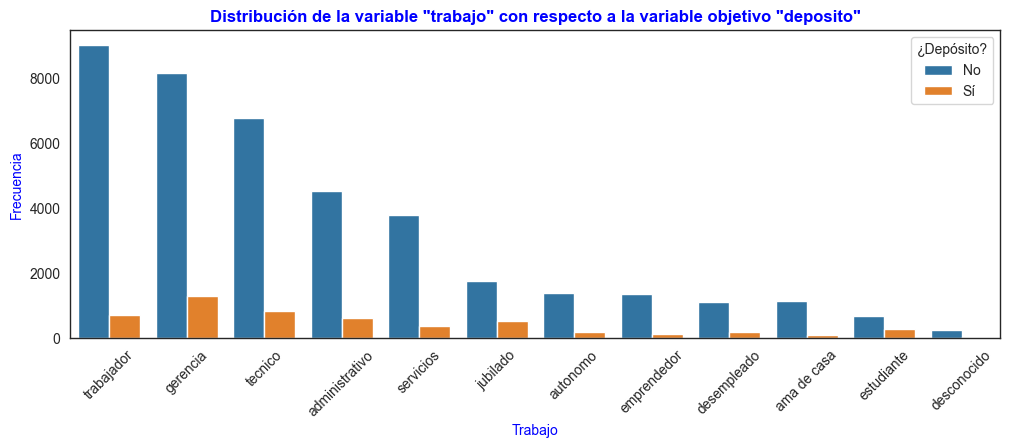

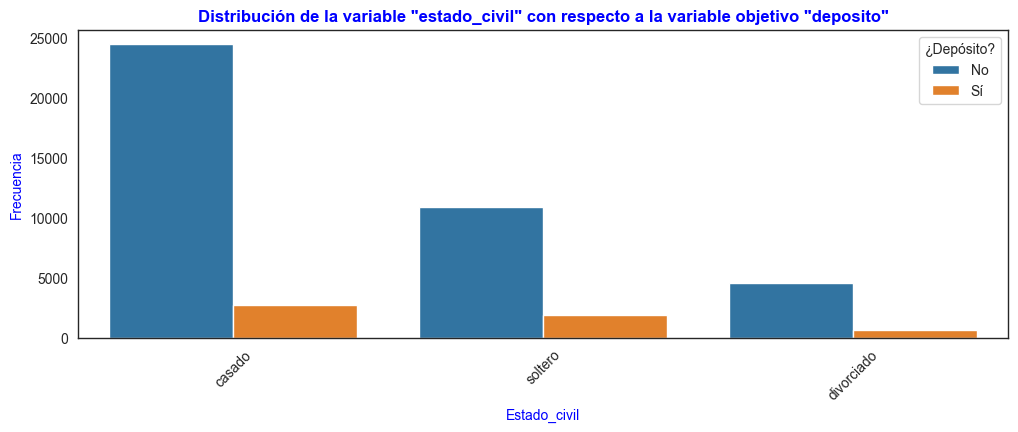

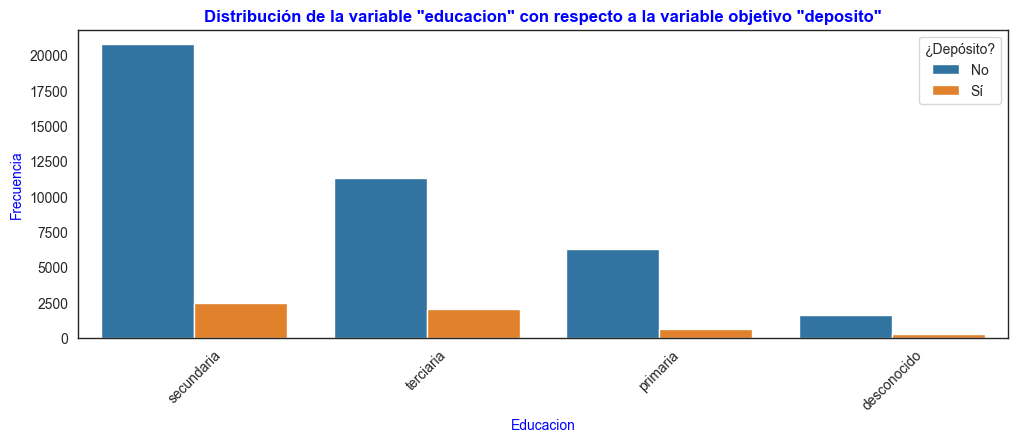

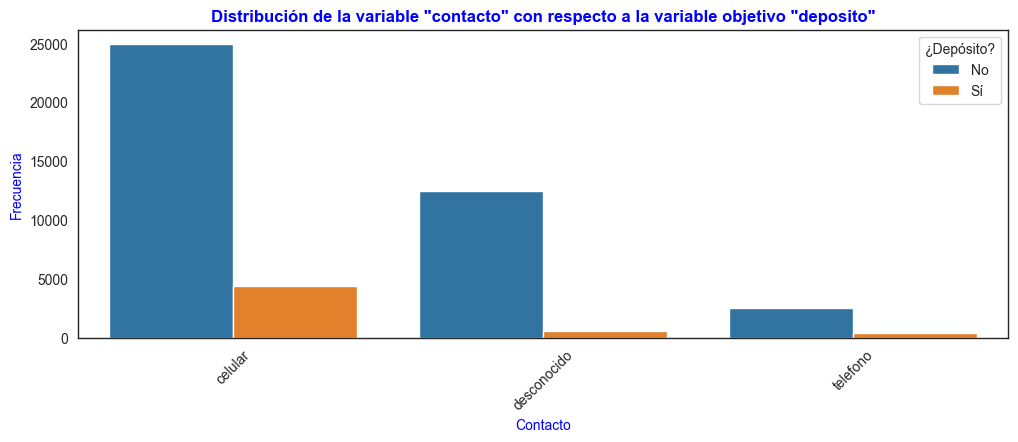

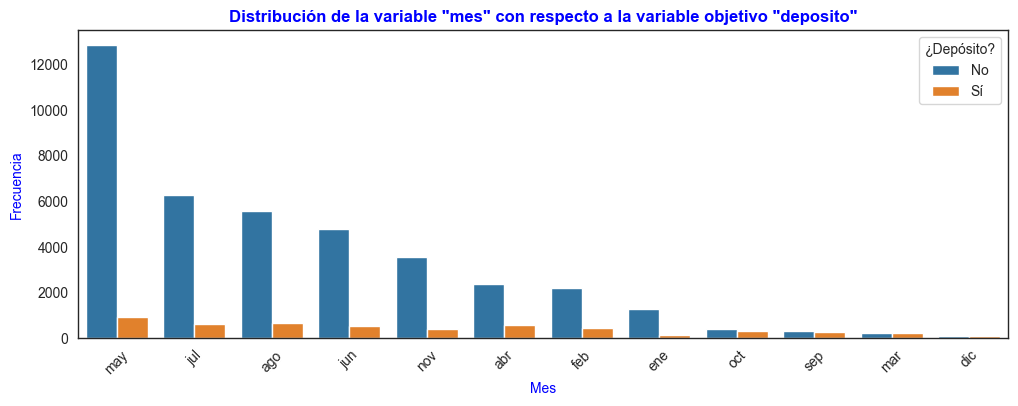

In [45]:
# Lista de variables categóricas
categorical_vars = ['trabajo', 'estado_civil', 'educacion', 'contacto', 'mes']

# Definir una paleta de colores personalizada
palette = {'no': '#1f77b4', 'si': '#ff7f0e'}

for var in categorical_vars:
    # Calcular las frecuencias de cada categoría y ordenarlas de mayor a menor
    order = Data[var].value_counts().index
    
    plt.figure(figsize=(12, 4))
    sns.countplot(x=var, hue='deposito', data=Data, order=order, palette=palette)
    plt.title(f'Distribución de la variable "{var}" con respecto a la variable objetivo "deposito"')
    plt.xticks(rotation=45)
    plt.xlabel(var.capitalize())
    plt.ylabel('Frecuencia')
    plt.legend(title='¿Depósito?', labels=['No', 'Sí'])  # Cambiar leyenda al español
    plt.show()

#### **Interpretación de las gráficas:**
De las anteriores gráficas que muestran la distribución de la variable objetivo 'deposito' se puede concluir que: las variables ***'trabajo', 'estado_civil', 'educacion', 'contacto', 'mes'*** muestran diferencias en la distribución entre las clases de la variable objetivo, lo que sugiere que pueden servir para predecir si un cliente contratará o no un depósito a plazo fijo.



##### **2.2** ***Variables NUMÉRICAS***: *'edad', 'duracion'*

In [71]:
# Cálculo de Moda
moda_edad = Data['edad'].mode()[0]
moda_duracion = Data['duracion'].mode()[0]

print(f"La moda de la variable 'edad' es: {moda_edad}")
print(f"La moda de la variable 'duracion' es: {moda_duracion}")

La moda de la variable 'edad' es: 32
La moda de la variable 'duracion' es: 124


In [72]:
#Calcular la mediana
mediana_edad = Data['edad'].median()
mediana_duracion = Data['duracion'].median()

print(f"La mediana de la variable 'edad' es: {mediana_edad}")
print(f"La mediana de la variable 'duracion' es: {mediana_duracion}")

La mediana de la variable 'edad' es: 39.0
La mediana de la variable 'duracion' es: 180.0


In [73]:
#Calcular la media
media_edad = Data['edad'].mean()
media_duracion = Data['duracion'].mean()

print(f"La media de la variable 'edad' es: {media_edad}")
print(f"La media de la variable 'duracion' es: {media_duracion}")

La media de la variable 'edad' es: 40.93621021432837
La media de la variable 'duracion' es: 258.1630797814691


In [74]:
# Descripción de las variables numéricas
numerical_vars = ['edad', 'duracion']

print(Data[numerical_vars].describe())

               edad      duracion
count  45211.000000  45211.000000
mean      40.936210    258.163080
std       10.618762    257.527812
min       18.000000      0.000000
25%       33.000000    103.000000
50%       39.000000    180.000000
75%       48.000000    319.000000
max       95.000000   4918.000000


* **Percentiles**: 
```
      25% (33): El 25% de los clientes tiene 33 años o menos.
      75% (48): El 75% de los clientes tiene 48 años o menos, indicando que el 25% restante tiene más de 48 años.
```


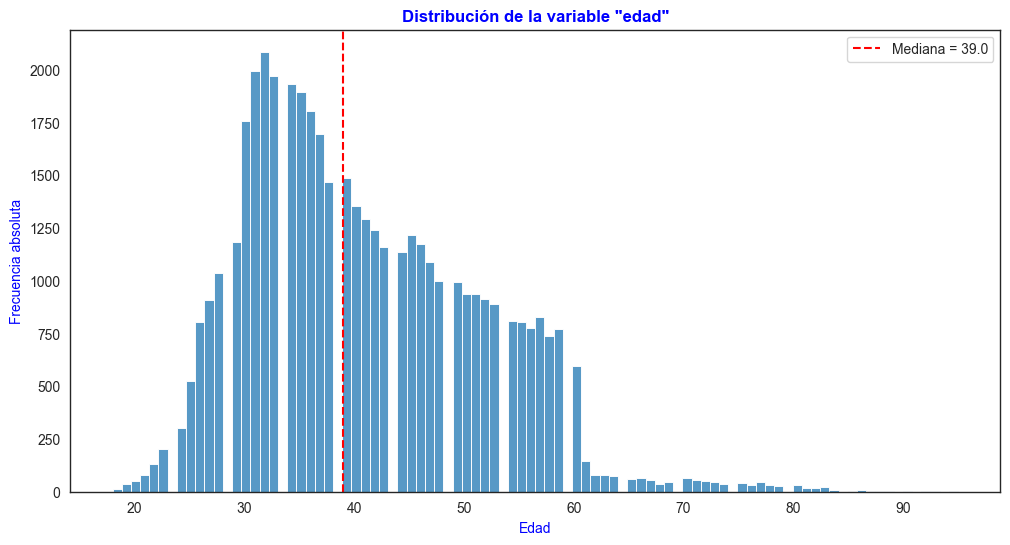

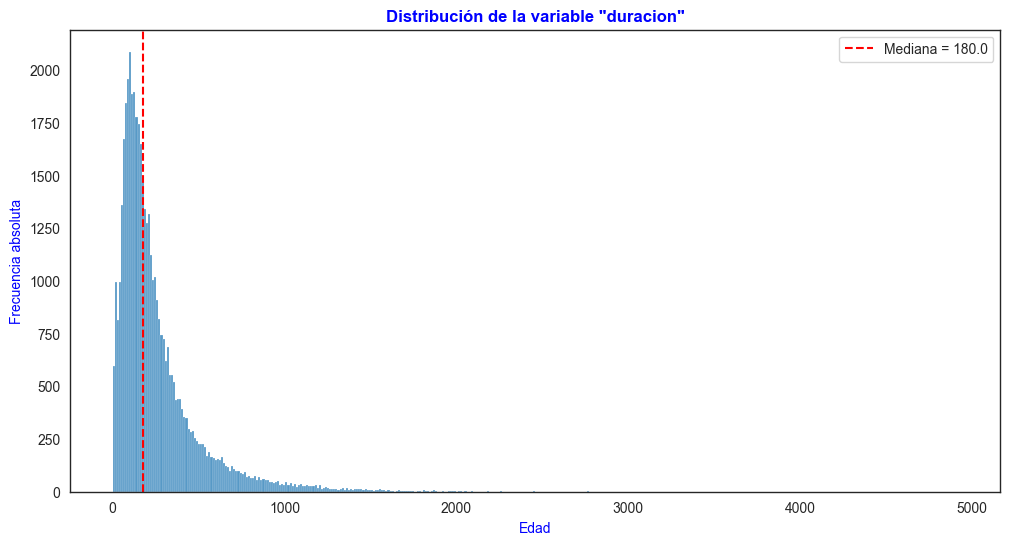

In [75]:
# Graficando las variables numéricas "edad y duración"

for var in numerical_vars:
    plt.figure(figsize=(12, 6))
    sns.histplot(Data[var])
    plt.axvline(Data[var].median(), color='red', linestyle='--', label=f'Mediana = {Data[var].median():.1f}')
    plt.title(f'Distribución de la variable "{var}"')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia absoluta')
    plt.legend()
    plt.show()

### **Interpretación de las gráficas:**

#### Variable **edad**:

* **Distribución**: De los percentiles se observa que la distribución de la edad en el dataset muestra que la mayoría de los clientes tienen entre 33 y 48 años, con una edad promedio de alrededor de 41 años. La moda a los 32 años sugiere un pico en esa edad específica. La ligera diferencia entre la media y la mediana sugiere una distribución con un **leve sesgo positivo**, indicando que hay algunos clientes de mayor edad que elevan la media. En general, la dispersión de edades es amplia, reflejando una base de clientes diversa en términos de edad.
* **Mediana**: La mediana de la edad de los clientes es de aproximadamente 40 años, lo que significa que la mitad de los clientes tienen menos de 40 años y la otra mitad tiene más de 40 años.

#### Variable **duracion** (Duración de la llamada):

* **Distribución**: La distribución de la duración de la llamada parece ser asimétrica positiva, con la mayoría de las llamadas siendo de corta duración.
* **Mediana**: La mediana de la duración de la llamada es de aproximadamente 180 segundos, lo que significa que la mitad de las llamadas duran menos de 180 segundos y la otra mitad dura más.

## **3. Exploración de relaciones con la variable objetivo:**

#### **3.1 Edad y Variable objetivo**

Ahora, para dar continuidad con las hipótesis planteadas exploraremos la relación entre edad "Age" y la variable objetivo "y "

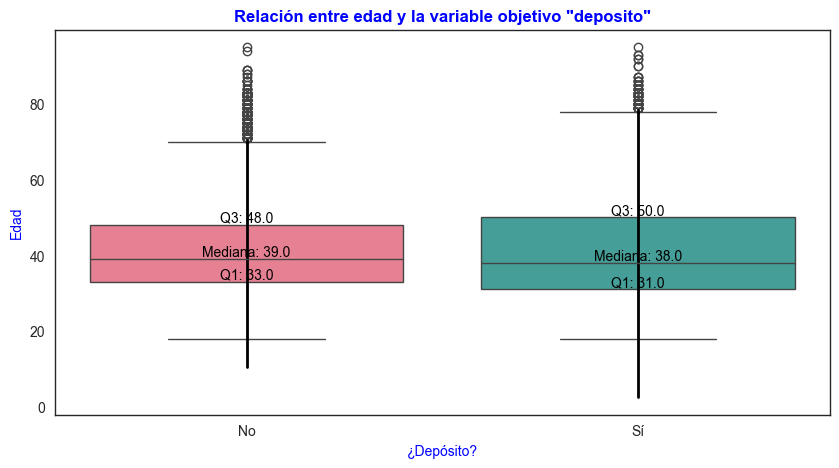

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='deposito', y='edad', data=Data, hue='deposito', palette='husl', legend=False)
plt.title('Relación entre edad y la variable objetivo "deposito"')

# Añadir mediana, cuartiles y bigotes
medians = Data.groupby('deposito')['edad'].median().values
for i in range(len(medians)):
    plt.text(i, medians[i], f'Mediana: {medians[i]}', ha='center', va='bottom', color='black', fontsize=10)

q1 = Data.groupby('deposito')['edad'].quantile(0.25).values
q3 = Data.groupby('deposito')['edad'].quantile(0.75).values
for i in range(len(q1)):
    plt.text(i, q1[i], f'Q1: {q1[i]}', ha='center', va='bottom', color='black', fontsize=10)
    plt.text(i, q3[i], f'Q3: {q3[i]}', ha='center', va='bottom', color='black', fontsize=10)

whiskers = [(q1[i] - 1.5 * (q3[i] - q1[i]), q3[i] + 1.5 * (q3[i] - q1[i])) for i in range(len(q1))]
for i in range(len(whiskers)):
    plt.plot([i, i], [whiskers[i][0], whiskers[i][1]], color='black', linestyle='-', linewidth=2)

plt.ylabel('Edad')
plt.xlabel('¿Depósito?')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()



#### **Interpretación del boxplot**:
  * La dispersión de las edades para los clientes que contrataron un depósito a plazo fijo ('Sí') es un poco mayor que para aquellos que no contrataron ('no').
  * Hay más valores atípicos a edades más avanzadas entre los clientes que no contrataron un depósito a plazo fijo ('no').

#### **3.2 Duración llamada y Variable objetivo (deposito)**

Ahora, con respecto a la hipótesis planteadas sobre la duración de la llamada, graficaremos un "boxplot"

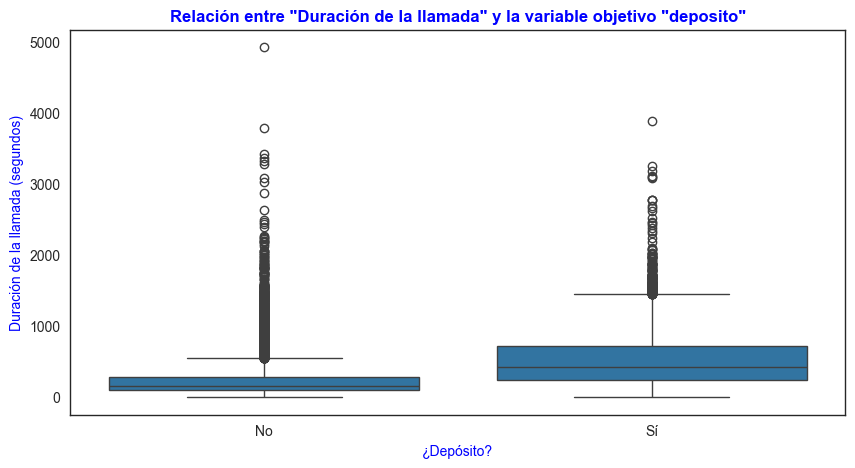

In [94]:
plt.figure(figsize=(10,5))
sns.boxplot(x='deposito', y='duracion', data=Data)
plt.title('Relación entre "Duración de la llamada" y la variable objetivo "deposito"')
plt.xlabel('¿Depósito?')
plt.ylabel('Duración de la llamada (segundos)')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

### **Interprestación del boxplot**:

* La mediana de la duración de la llamada para los clientes que contrataron un depósito a plazo fijo ('Sí') parece ser mayor que la mediana de la duración de la llamada para los clientes que no contrataron ('No'). Esto sugiere que **las llamadas más largas tienden a ser más efectivas en la contratación de depósitos a plazo fijo**. Esto puede ser muy útil para ajustar estrategias de marketing y optimizar el tiempo de los agentes de ventas.

### **Análisis adicional**: Gráfica de Tasa de Conversión por Segmento de Duración

Para complementar la interpretación anterior, se crean segementos de duración de la llamada con el propósito de observar cómo varía la tasa de conversión en diferentes duraciones de llamadas

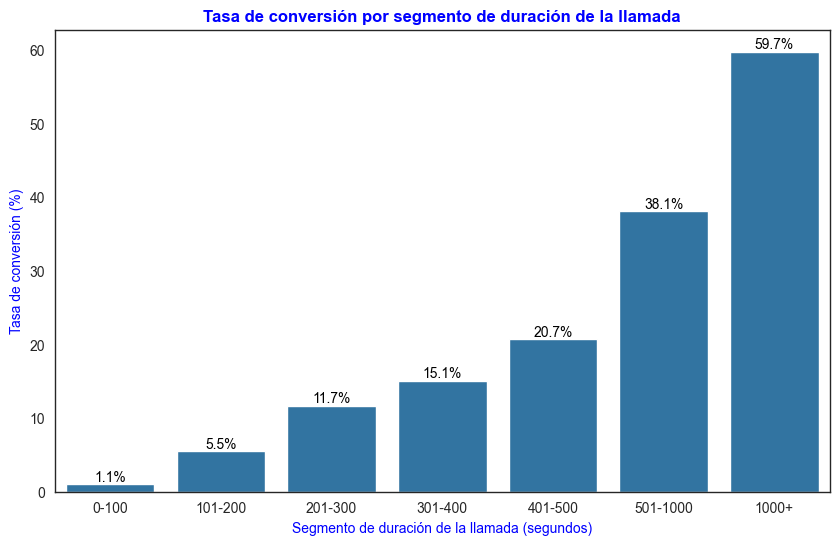

In [137]:
# Mapeo de 'deposito' a valores binarios
Data['deposito'] = Data['deposito'].map({'si': 1, 'no': 0})

# Nueva columna de segmento de duración
bins = [0, 100, 200, 300, 400, 500, 1000, Data['duracion'].max()]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-1000', '1000+']
Data['duracion_segmento'] = pd.cut(Data['duracion'], bins=bins, labels=labels)

# Calcular la tasa de conversión por segmento de duración
conversion_rate = Data.groupby('duracion_segmento', observed=True)['deposito'].mean() * 100

# Visualizar la tasa de conversión por segmento de duración
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=conversion_rate.index, y=conversion_rate.values)
plt.title('Tasa de conversión por segmento de duración de la llamada')
plt.xlabel('Segmento de duración de la llamada (segundos)')
plt.ylabel('Tasa de conversión (%)')

# Agregar los porcentajes encima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.show()

### **Interpretación de la gráfica**:

### Identificación de Patrones y Tendencias:


* **Patrón de Crecimiento**: La tasa de conversión aumenta con la duración de la llamada, esto sugiere que dedicar más tiempo a una llamada generalmente resulta en una mayor probabilidad de éxito.
  
* **Punto de Saturación**: No hay un pico en tasa de conversión que luego disminuya.

Con lo anterior, **no se puede rechazar la hipótesis**:
  > **2**. La **las llamadas que duran menos tiempo** son las que muestran que el cliente no está interesado en la oferta

### **3.3 Exploración de Distribución creando categorías entre rangos de edades**
A continuación se muestran gráficas de distribución creando los rangos de edades así: Joven (18-35), Adulto (36-60), Adulto-mayor(>61)

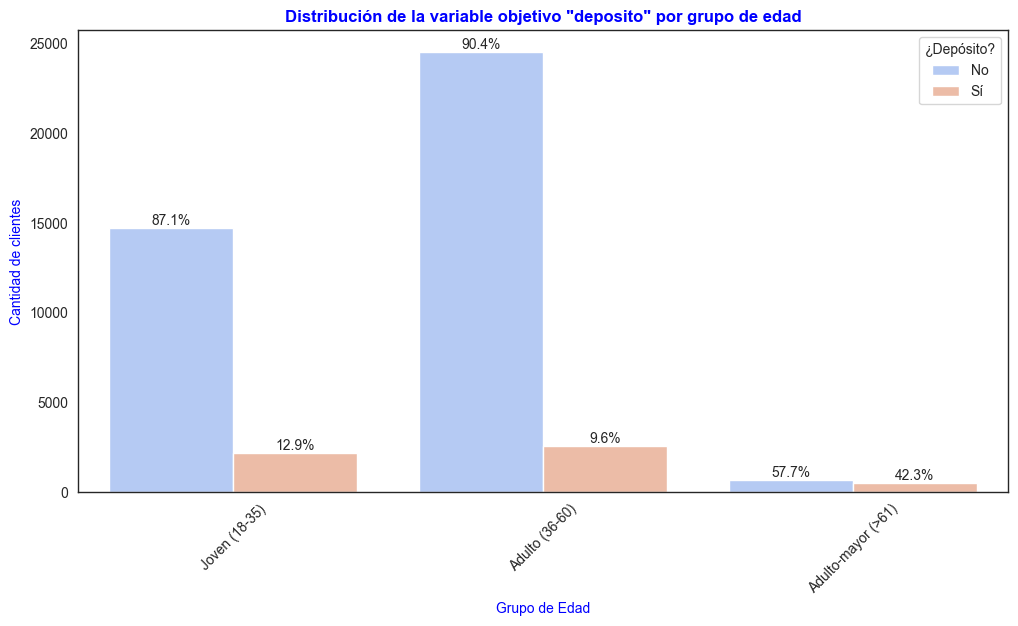

In [101]:
# Crear los grupos de edades combinados
Data['grupo_edades'] = pd.cut(Data['edad'], bins=[18, 35, 60, Data['edad'].max()],
                              labels=['Joven (18-35)', 'Adulto (36-60)', 'Adulto-mayor (>61)'])

# Crear el gráfico combinado
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='grupo_edades', hue='deposito', data=Data, palette='coolwarm')

# Calcular los totales por grupo de edad
total_joven = Data[Data['grupo_edades'] == 'Joven (18-35)']['grupo_edades'].count()
total_adulto = Data[Data['grupo_edades'] == 'Adulto (36-60)']['grupo_edades'].count()
total_adulto_mayor = Data[Data['grupo_edades'] == 'Adulto-mayor (>61)']['grupo_edades'].count()

# Anotar los porcentajes sobre cada barra
for container in ax.containers:
    labels = [f'{(value/total_joven*100):.1f}%' if 'Joven' in str(label.get_text()) else 
              (f'{(value/total_adulto*100):.1f}%' if 'Adulto (36-60)' in str(label.get_text()) else 
               f'{(value/total_adulto_mayor*100):.1f}%') 
              for value, label in zip(container.datavalues, ax.get_xticklabels())]
    ax.bar_label(container, labels=labels)

plt.title('Distribución de la variable objetivo "deposito" por grupo de edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.legend(title='¿Depósito?', labels=['No', 'Sí'])
plt.show()

### **3.4 Análisis para Adulto-mayor**
Debido que en la anterior gráfica el grupo "Adulto-mayor" no se alcanza a apreciar visualmente la diferencia se procede a graficarlo individualmente.

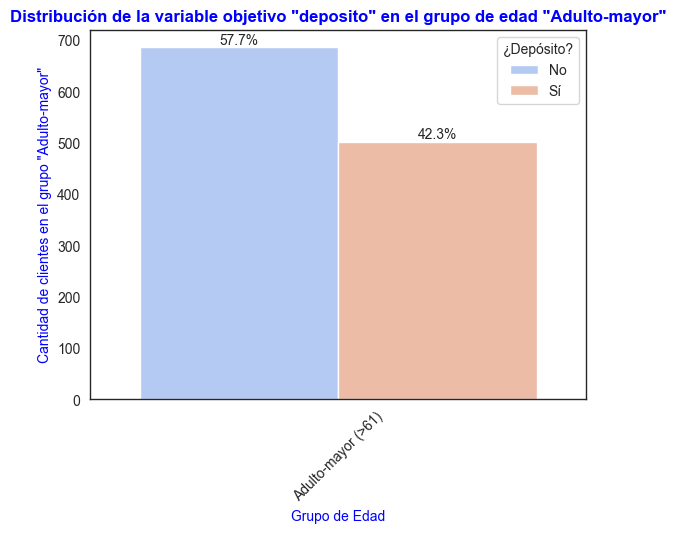

In [98]:
# Segmentar edades en grupos: 
Data['grupo_edades'] = pd.cut(Data['edad'], bins=[60, Data['edad'].max()], labels=['Adulto-mayor (>61)'])


# Filtrar solo el grupo de edad
Data_adulto_mayor = Data[Data['grupo_edades'] == 'Adulto-mayor (>61)']

ax = sns.countplot(x='grupo_edades', hue='deposito', data=Data, palette='coolwarm')

# Cantidad total
total_adulto_mayor = Data_adulto_mayor['grupo_edades'].count()

# anotar las barras con fmt de matplotlib v3.7.0  (Muestra porcentajes sobre cada barra)
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total_adulto_mayor)*100:0.1f}%')
ax.bar_label(ax.containers[1], fmt=lambda x: f'{(x/total_adulto_mayor)*100:0.1f}%')

plt.title('Distribución de la variable objetivo "deposito" en el grupo de edad "Adulto-mayor"')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de clientes en el grupo "Adulto-mayor"')
plt.xticks(rotation=45)
plt.legend(title='¿Depósito?', labels=['No', 'Sí'])
plt.show()


### **Interpretación de las gráficas de distribución por grupos de edad**

* El rango de edad donde hubo un mayor porcentaje de clientes que tomaron el depósito a largo plazo fue el de **Adulto-mayor (> 61 años)**, lo que quiere decir que **se puede rechazar** la hipótesis inicial:

  > **1**. El grupo de  **edad adulta (18-35 años)** podría ser determinante puesto que en este rango de edad se adquiere una conciencia económica para hacer la inversión de un depósito a plazo fijo.


## **4. Implementación de un modelo de Aprendizaje Supervisado**

En esta sección, procederemos a la implementación de un modelo de Aprendizaje Supervisado, utilizando el conjunto de datos de marketing bancario previamente preparado. El objetivo principal es predecir si un cliente contratará un depósito a plazo fijo, basándonos en diversas características demográficas y de comportamiento.

### **4.1 Selección del Modelo**
Para abordar este problema de clasificación, hemos optado por utilizar el **Random Forest Classifier**, un potente algoritmo de ensamblaje basado en árboles de decisión. Este modelo es conocido por su capacidad para manejar tanto variables categóricas como numéricas y por su robustez ante el sobreajuste, debido a su método de agregación de múltiples árboles de decisión.

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Selecciona todas las columnas excepto la variable objetivo como características.
features = Data.drop(columns=['deposito'])
target = Data['deposito']

### **4.2 Convertir las variables categóricas en variables dummies (One-Hot Encoding)**
Debido a que **RandomForestClassifier** no puede manejar directamente las variables categóricas en formato de texto, se debe convertir las variables categóricas a un formato numérico antes de entrenar el modelo. 

In [148]:
# Convierte las variables categóricas a variables dummy (One-Hot Encoding).
features_encoded = pd.get_dummies(features)

### **4.3 Entrenando el modelo con RandomForest**
Dividimos los datos en conjuntos de entrenamiento y prueba usando una proporción del 70% para entrenamiento y el 30% para prueba. Esto nos permite evaluar el rendimiento del modelo con datos no vistos durante el entrenamiento.

In [158]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

#Crea una instancia del clasificador Random Forest.
model = RandomForestClassifier(random_state=42)

# Entrena el modelo con los datos de entrenamiento.
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **5. Evaluación del modelo**

### **5.1 Predecir con los datos de prueba**

In [159]:
# Predice los resultados para el conjunto de prueba.
y_pred = model.predict(X_test)

### **5.2 Evaluar el rendimiento del modelo**

### **5.2.1 Precisión (Accuracy)**
La precisión es una métrica básica que indica la proporción de predicciones correctas realizadas por el modelo en el conjunto de prueba. Se calcula como la relación entre el número de predicciones correctas y el número total de predicciones. Una mayor precisión sugiere que el modelo es generalmente bueno para clasificar correctamente tanto las instancias positivas como las negativas.

In [162]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Muestra la precisión del modelo.
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9051164848127397


### **5.2.2 Informe de Clasificación (Classification Report)**
El informe de clasificación proporciona una visión más detallada del rendimiento del modelo, desglosando la precisión, la exhaustividad (recall) y la puntuación F1 para cada clase (sí/no). La precisión indica cuántos de los ejemplos predichos como positivos son realmente positivos, mientras que la exhaustividad muestra cuántos de los ejemplos positivos reales fueron correctamente identificados por el modelo. La puntuación F1 es la media armónica de la precisión y la exhaustividad, ofreciendo una medida equilibrada.

In [163]:
# Muestra un informe de clasificación detallado.
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.64      0.44      0.52      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.70      0.73     13564
weighted avg       0.89      0.91      0.90     13564



### **5.2.3 Matriz de confusión**
La matriz de confusión es una herramienta visual que muestra el desempeño del modelo al ilustrar las verdaderas predicciones positivas y negativas, así como las falsas predicciones positivas y negativas. Esto nos permite identificar dónde el modelo comete errores y entender mejor sus fortalezas y debilidades.

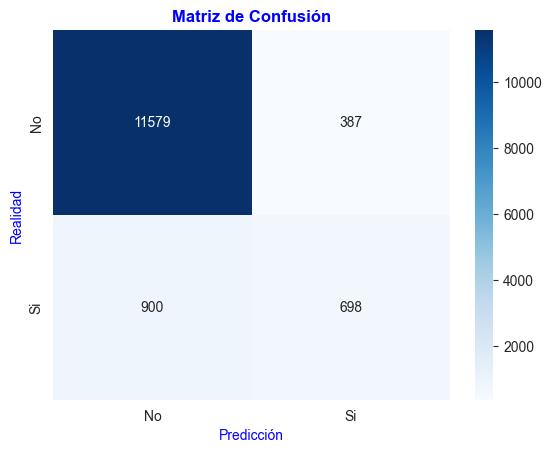

In [161]:
# Calcula la matriz de confusión.
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualiza la matriz de confusión usando Seaborn.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Si'], yticklabels=['No', 'Si'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

### **5.2.3 Conclusión de la Evaluación**:

El análisis de estas métricas y visualizaciones nos proporciona una visión integral del rendimiento del modelo. La precisión general nos indica la eficacia del modelo, mientras que el informe de clasificación y la matriz de confusión nos permiten profundizar en su comportamiento respecto a cada clase.

* **Precisión**: Nos da una idea general de la proporción de predicciones correctas.
* **Informe de Clasificación**: Proporciona una visión detallada de la precisión, la exhaustividad y la puntuación F1 para cada clase.
* **Matriz de Confusión**: Ayuda a identificar los tipos de errores que el modelo está cometiendo y su impacto en el rendimiento global.

En conjunto, estas herramientas nos aseguran que nuestro modelo de **Random Forest Classifier** es robusto y efectivo para ***predecir si un cliente contratará un depósito a plazo fijo***, y nos ayudan a identificar áreas de mejora para futuras iteraciones.
